In [1]:
#!python3 -m pip install git+https://github.com/csachs/kaggle-api.git@resumable
#!kaggle competitions download -c wikipedia-image-caption --force
#!unzip wikipedia-image-caption.zip -d wikipedia-image-caption

In [2]:
import pandas as pd
import base64 
from PIL import Image
import io

def get_img(data):
    image_64_decode = base64.b64decode(data)
    img = Image.open(io.BytesIO(image_64_decode))
    return img

def read_imgs():
    tst0 = pd.read_csv('wikipedia-image-caption/image_data_test/image_pixels/test_image_pixels_part-00000.csv',
                       sep='\t', header=None, names=["url", "img", "url2"])
    tst1 = pd.read_csv('wikipedia-image-caption/image_data_test/image_pixels/test_image_pixels_part-00001.csv',
                       sep='\t', header=None, names=["url", "img", "url2"])
    tst2 = pd.read_csv('wikipedia-image-caption/image_data_test/image_pixels/test_image_pixels_part-00002.csv',
                       sep='\t', header=None, names=["url", "img", "url2"])
    tst3 = pd.read_csv('wikipedia-image-caption/image_data_test/image_pixels/test_image_pixels_part-00003.csv',
                       sep='\t', header=None, names=["url", "img", "url2"])
    tst4 = pd.read_csv('wikipedia-image-caption/image_data_test/image_pixels/test_image_pixels_part-00004.csv',
                       sep='\t', header=None, names=["url", "img", "url2"])
    test_imgs = pd.concat([tst0, tst1, tst2, tst3, tst4])
    return test_imgs

test = pd.read_csv('wikipedia-image-caption/test.tsv', sep='\t')
test_no_dupl = test.drop_duplicates(subset=["image_url"])
test_with_imgs = test_no_dupl.merge(read_imgs(), left_on="image_url", right_on="url")
#print(test.head())
#print(test.iloc[0]["image_url"])

captions = pd.read_csv('wikipedia-image-caption/test_caption_list.csv')
#print(len(captions))
#print(captions.head())

sub = pd.read_csv('wikipedia-image-caption/sample_submission.csv')

https://upload.wikimedia.org/wikipedia/commons/3/3f/Scots_Gaelic_speakers_in_the_2011_census.png


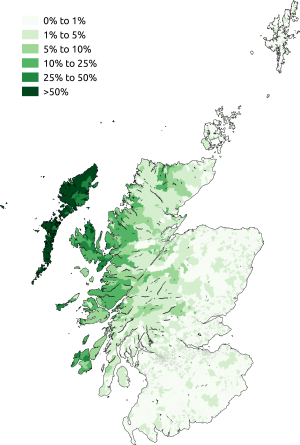

In [3]:
idx = 0
print(test_with_imgs.iloc[idx]["image_url"])
img = get_img(test_with_imgs["img"].loc[idx])
img

In [4]:
#!python3 -m pip install datatable
# train data

#import datatable as dt
#train0 = dt.fread('wikipedia-image-caption/train-00000-of-00005.tsv')

In [5]:
# baseline

# predict captions using URL
from urllib.parse import unquote

t = test.image_url.loc[2]

def convert(t):
    t = t.rsplit('/',1)[1]
    t = unquote(t)
    t = t.replace('_', ' ')
    t = t.split(".")[0]
    t = t + ' [SEP]'
    return(t)

#for i in range(5):
#    print(f'target: {train0[i,-1]}')
#    print(f'prediction: {convert(train0[i,1])}')
#    print()
    
test_with_imgs['caption_pred'] = test['image_url'].apply(convert)

CAPTIONS = captions.caption_title_and_reference_description.values.tolist()

In [6]:
#!python3 -m pip install rapidfuzz

image_url: Kingsley Coman Training FC Bayern München-1 (cropped)-2 [SEP]
closest captions:


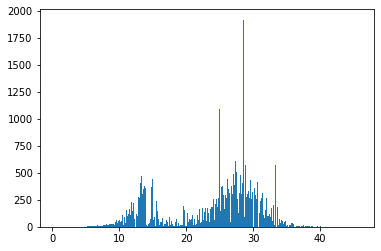

Battle Command Training Center-Leavenworth [SEP] BCTC-Leavenworth Logo 45.8
List of Santos FC players [SEP] Pepe 43.3
Igreja de Nossa Senhora da Conceição (Ermida) [SEP] Siglas. 41.67
************************************************************

image_url: Rhosgadfan Park and Community Wood - geograph [SEP]
closest captions:


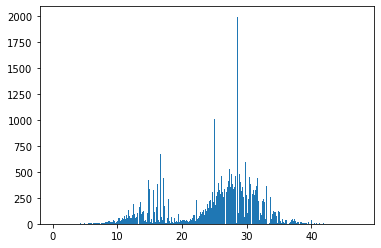

Taylor Peak (Grand County, Colorado) [SEP] Taylor Peak in 1921. 47.37
Southern Maine Community College [SEP] Shoreway Arboretum 46.3
Metropolitan Community Church [SEP] Abendmahl 45.83
************************************************************

image_url: Dome in the Desert, Grapevine Road, Cave Creek, Maricopa County, AZ HABS ARIZ,7-CACR,1- (sheet 3 of 4) [SEP]
closest captions:


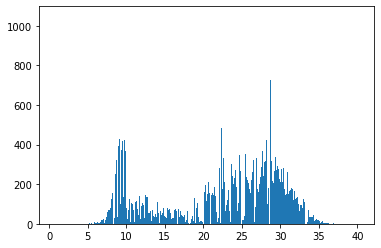

Blossoms in the Dust [SEP] Walter Pidgeon e Greer Garson em outra cena do trailer do filme. 40.2
National Register of Historic Places in Arizona [SEP] Maricopa County Courthouse in Phoenix 40.2
Maricopa County Sheriff's Office controversies [SEP] The Maricopa County Court House 39.58
************************************************************

image_url: Bingshan Shang de Laike [SEP]
closest captions:


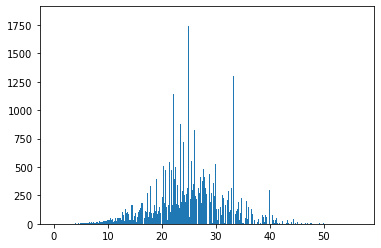

Binn Éadair [SEP] an trá 56.6
Rasha Sharbaji [SEP] Syria 54.55
Santiago de Chile [SEP] Escudo 54.24
************************************************************

image_url: Gangnam Station, Shinbundang Line, Seoul, South Korea [SEP]
closest captions:


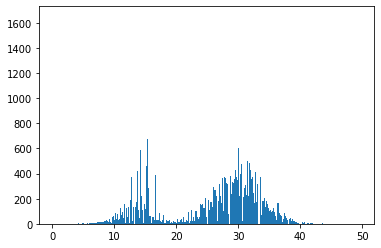

Glengyle Station [SEP] Channel Country 49.48
National Route 32 (South Korea) [SEP] National Route 32 47.37
South Kensington Station [SEP] Indgang på Pelham Street 47.37
************************************************************

image_url: Stanley Steam Car 1919 engine [SEP]
closest captions:


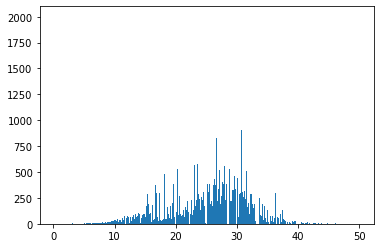

St. Stephan, Baden [SEP] Interior 50.0
Liste des phares en Virginie [SEP] Cape Henry 50.0
San Polo dei Cavalieri [SEP] Situo 49.28
************************************************************

image_url: The Catamount, Bennington, Vt (NYPL b12647398-67934) [SEP]
closest captions:


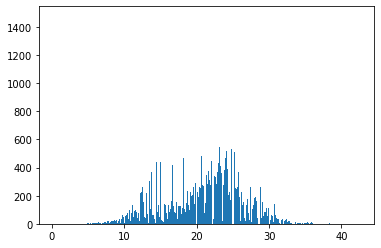

John Cameron (Queensland politician, born 1834) [SEP] Doobawah, circa 1900 42.42
Pierce County (Washington) [SEP] Gig Harbor 41.58
Peyton List (attrice 1986) [SEP] Peyton List 41.18
************************************************************

image_url: Anglican Holy Trinity Cathedral Accra [SEP]
closest captions:


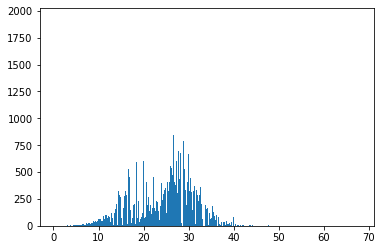

Religion in Ghana [SEP] Anglican Holy Trinity Cathedral, Accra, Ghana 67.86
Holy Trinity Orthodox Cathedral, Lutsk [SEP] Plan 63.04
Holy Trinity Cathedral (Accra) [SEP] Anglican Holy Trinity Cathedral in Accra. 61.16
************************************************************

image_url: IndianTerritory [SEP]
closest captions:


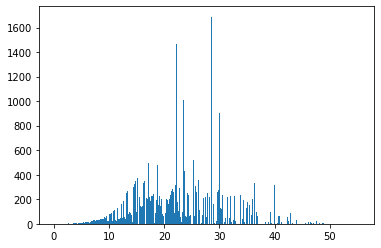

Venado Tuerto [SEP] Escudo 55.32
Masisi Territory [SEP] View of Masisi 55.17
Reid, Australian Capital Territory [SEP] Euree St 54.29
************************************************************

image_url: Картинка3 [SEP]
closest captions:


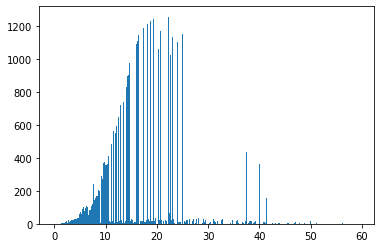

Каркаваду [SEP] Цягнік 59.46
Пригниц [SEP] Грб 56.25
Шостка [SEP] АС-2 56.25
************************************************************

image_url: Nova Friburgo (RJ) - 2 [SEP]
closest captions:


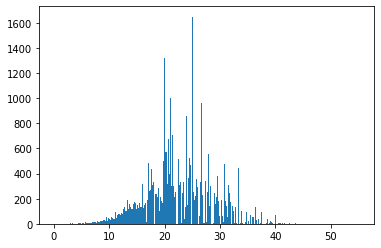

Nova Friburgo [SEP] Nova Friburgo in 1964 55.07
Nova Friburgo [SEP] Nova Friburgo em 1972. 54.29
Northeast Kingdom [SEP] . 49.06
************************************************************

image_url: Acropolis of Athens 01361 [SEP]
closest captions:


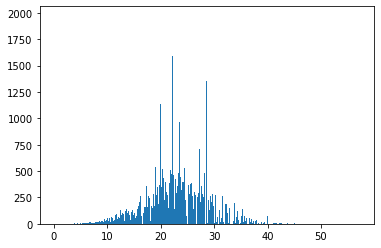

Gospel of the Horns [SEP] Mersus 57.14
Propylaea (Acropolis of Athens) [SEP] Plan of the Propylaea 55.56
Akropolis (Athen) [SEP] Vestsiden af Parthenon 51.95
************************************************************

image_url: Koumi-town-Office [SEP]
closest captions:


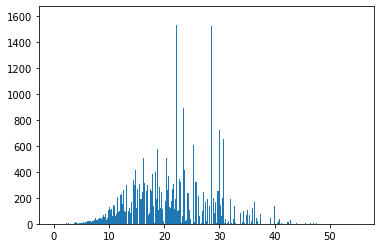

Kopřivnice [SEP] Nádraží 55.32
Louňovice [SEP] Escudo 53.33
Šitbořice [SEP] Bandera 52.17
************************************************************

image_url: Jaruzelski Castro 1972 [SEP]
closest captions:


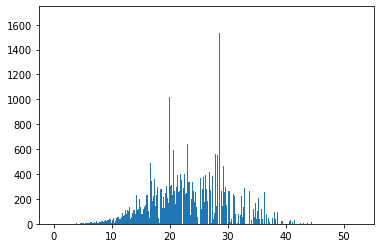

Raúl Castro [SEP] Raúl Castro 52.63
Raúl Castro [SEP] Raúl Castro 52.63
Raúl Castro [SEP] Raúl Castro 52.63
************************************************************

image_url: LoretoPlazaSWDF [SEP]
closest captions:


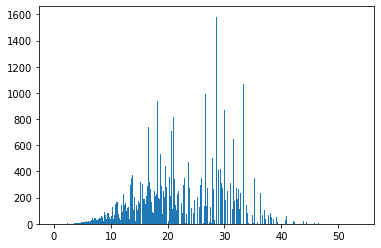

Port Vila [SEP] Flag 53.66
Roberto Matta [SEP] 1960 53.33
Porto [SEP] Porto. 51.28
************************************************************

image_url: Charney Hall Law Library  [SEP]
closest captions:


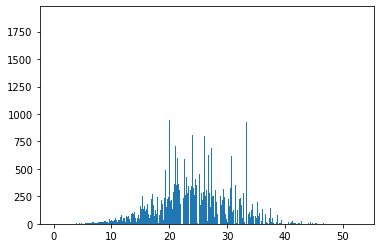

Daerah Halland [SEP]   52.83
Carmen Barbará [SEP] in 2010 50.85
Sofiane Harkat [SEP] 2006 50.0
************************************************************

image_url: California US Congressional District 12 (since 2013) [SEP]
closest captions:


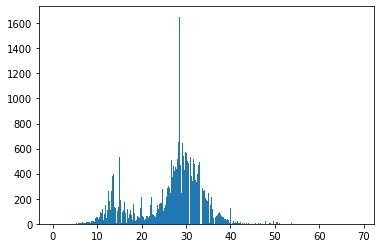

California's 17th congressional district [SEP] 2003 – 2013 68.97
California's 26th congressional district [SEP] 2003 - 2013 68.97
Illinois's 6th congressional district [SEP] 2003 - 2013 60.18
************************************************************

image_url: Tbilisi Art Acdemy photo from archive [SEP]
closest captions:


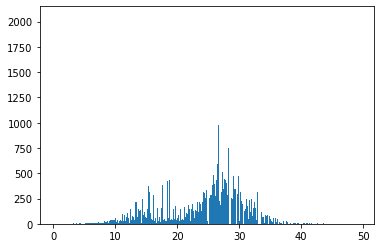

Distrito de Złotoryja [SEP] Escudo 49.35
Liste des phares de Croatie [SEP] Palagruza 48.84
Lista över motorvägar i Bulgarien [SEP] A1. 48.84
************************************************************

image_url: Mccall [SEP]
closest captions:


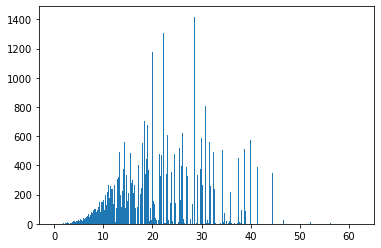

Malfa [SEP] Malfa 62.07
Malfa [SEP] Malfa 62.07
Malfa [SEP] Malfa 62.07
************************************************************

image_url: Altadena library charlene [SEP]
closest captions:


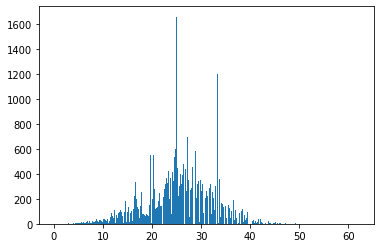

Altadena Library District [SEP] Main Branch 62.16
Alna linnaosa [SEP] Alna 54.55
Daerah Halland [SEP]   52.83
************************************************************



In [8]:
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz

for i in range(310, 330):
    s = test_with_imgs.caption_pred.loc[i]
    print(f'image_url: {s}')
    res = process.extract(s, CAPTIONS, scorer=fuzz.ratio, processor=None, limit=None)
    print(f'closest captions:')
    scores = [r[1] for r in res]
    plt.hist(scores, bins=1000)
    plt.show()
    for c in res[:3]:
        print(c[0], round(c[1], 2)) # caption
        #print(c[1]) # score between 0-100
        #print(c[2]) # idx
    print('*'*60)
    print()  

In [14]:
import numpy as np
scores = [[res[1] for res in process.extract(s, CAPTIONS, scorer=fuzz.ratio, processor=None, limit=5)]
          for s in test_with_imgs["caption_pred"].iloc[:1000]]
scores = np.concatenate(scores)

(0.0, 100.0)

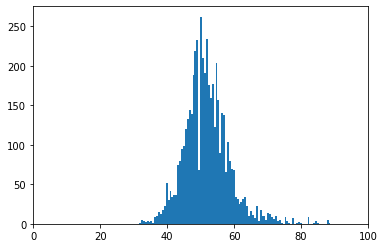

In [15]:
import matplotlib.pyplot as plt

p = plt.hist(scores, bins=100)
plt.xlim(0, 100)

In [16]:
np.quantile(scores, 0.95)

63.23592257415787

In [17]:
# fuzzy matching

from rapidfuzz import process, fuzz

def find_closest_match(s):
    res = process.extract(s, CAPTIONS, scorer=fuzz.ratio, processor=None, limit=5)
    res = [x[0] for x in res]
    scores = [x[1] for x in res]
    return res, scores


from tqdm.auto import tqdm
tqdm.pandas()


#test['caption_title_and_reference_description'] = test['prediction'].progress_apply(find_closest_match)

#make sub
#base_sub = test[['id', 'caption_title_and_reference_description']]
#base_sub = base_sub.explode('caption_title_and_reference_description')
#base_sub.head()

#base_sub.to_csv('submission.csv', index=False)

In [18]:
#base_sub

In [19]:
from tqdm.auto import tqdm

def decode_img(img_bytes):
    image_64_decode = base64.b64decode(img_bytes)
    img = Image.open(io.BytesIO(image_64_decode))
    return img

@torch.inference_mode()
def get_img_feats(imgs, model, device, bs=16):
    pbar = tqdm(list(range(0, len(imgs), bs)))
    all_feats = torch.zeros(len(imgs), 512).float()
    for i in pbar:
        img_batch = imgs[i: i + bs]
        img_batch = [decode_img(i) for i in img_batch]
        transformed_batch = torch.stack([transform(img) for img in img_batch]).to(device)
        feats = model.encode_image(transformed_batch).cpu()
        all_feats[i: i + bs] = feats
    return all_feats

In [20]:
@torch.inference_mode()
def get_text_feats(texts, model, device, bs=16):
    all_feats = torch.zeros(len(texts), 512)
    
    for i in tqdm(list(range(0, len(texts), bs))):
        text_batch = texts[i: i + bs]
        tokenized = clip.tokenize(text_batch, truncate=True).to(device)
        text_feats = model.encode_text(tokenized)
        text_feats = text_feats.cpu().float()
        
        all_feats[i: i + bs] = text_feats
    return all_feats

In [21]:
model_name = "ViT-B/16" # "ViT-B/16" or "ViT-B/32" or ""RN50x16""
name = "vit32" if "32" in model_name else "vit16"
print(name)

vit16


In [22]:
import clip
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, transform = clip.load(model_name, device=device)

In [ ]:
img_feats = get_img_feats(test_with_imgs["img"], model, device, bs=16)

  0%|          | 0/2798 [00:00<?, ?it/s]

In [ ]:
import torch
torch.save(img_feats, f"test_img_feats_{name}.pt")
#img_feats = torch.load(f"test_img_feats_{name}.pt")

In [ ]:
# possibly include encodings of captions somewhow
#captions_preds = test_with_imgs['caption_pred']

In [ ]:
# encode possible test cpations
test_captions_dot = [c.replace(" [SEP]", ".") for c in CAPTIONS]
test_caption_feats = get_text_feats(test_captions_dot, model, device, bs=32)

In [ ]:
import torch
torch.save(test_caption_feats, f"test_caption_feats_{name}.pt")
#test_caption_feats = torch.load(f"test_caption_feats_{name}.pt")

  0%|          | 0/44762 [00:00<?, ?it/s]

['Gàidhealtachd [SEP] Geographic distribution of Gaelic speakers in Scotland (2011)', 'Hebrides [SEP] Geographic distribution of Gaelic speakers in Scotland (2011)', 'Irish language [SEP] The percentage of respondents who said they spoke Irish daily outside the education system in the 2011 census in the State.', 'Scottish Gaelic [SEP] 2011 distribution of Gaelic speakers in Scotland', 'Irische Sprache [SEP] Heutige Verbreitung des Irischen in der Republik Irland als Erst- und Zweitsprache nach dem Zensus von 2011']


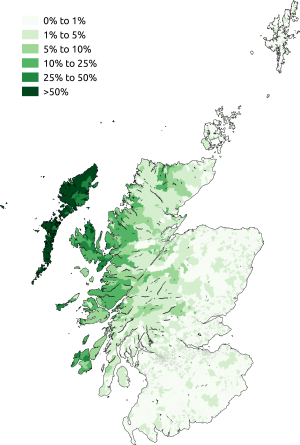

  0%|          | 1/44762 [00:00<1:23:59,  8.88it/s]

['Río Marañón [SEP] Die Río Marañón in die Huánuco-streek, Peru', "Terres altes d'Escòcia [SEP] El Llac Ness, a les terres altes d'Escòcia", 'Λίμνη Βουλιαγμένης [SEP] Άποψη της λίμνης', 'Kaesong [SEP] Graven til kong Wanggon.', 'Karaizel Nehri [SEP] Ufa yarımadadır. Nerede: 1-Ağizel Nehri, 2-Karaizel Nehri, 3-Dim Nehri']


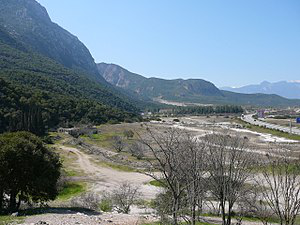

  0%|          | 2/44762 [00:00<1:25:16,  8.75it/s]

['Pembroke, New York [SEP] Location in Genesee County and the state of New York', 'National Register of Historic Places listings in Essex County, Vermont [SEP] Location of Essex County in Vermont', 'Richland County, Ohio [SEP] Location within the U.S. state of Ohio', 'Stafford, New York [SEP] Location in Genesee County and the state of New York.', "New York's 26th congressional district [SEP] New York's 26th congressional district since January 3, 2013"]


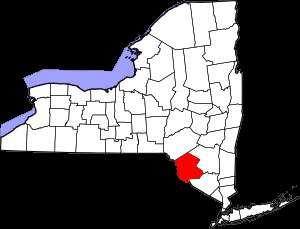

  0%|          | 2/44762 [00:00<2:05:59,  5.92it/s]


In [34]:
from tqdm import tqdm
from IPython.display import display

use_fuzzy = 1
verbose = 1

# make all predictions based on top 5 similarities
all_top_5_captions = []
for test_idx in tqdm(range(len(test_with_imgs))):
    scores = 0
    # clip similarities
    img_sims = torch.nn.functional.cosine_similarity(test_caption_feats, 
                                                     img_feats[test_idx].unsqueeze(0))
    normed_sims = img_sims / img_sims.std()
    scores += normed_sims
    # fuzzy caption matching
    if use_fuzzy:
        s = test_with_imgs.caption_pred.iloc[test_idx]
        res = process.extract(s, CAPTIONS, scorer=fuzz.ratio, processor=None, limit=None)
        fuzzy_scores = [r[1] for r in res]
        # if fuzzy match is large enough, consider its score 
        if fuzzy_scores[0] > 0.55:
            fuzzy_scores = torch.tensor(fuzzy_scores)
            normed_fuzzy_scores = fuzzy_scores / fuzzy_scores.std()
        else:
            normed_fuzzy_scores = 0
        scores += normed_fuzzy_scores
    idcs = scores.topk(5, largest=True).indices.tolist()
    top_5 = [CAPTIONS[idx] for idx in idcs]
    
    if verbose:
        print(top_5)
        display(decode_img(test_with_imgs.iloc[test_idx]["img"]))
        if test_idx == 2:
            break
            
    all_top_5_captions.append(top_5)

In [ ]:
save_name = name + ('_fuzzy' if use_fuzzy else '') 

In [ ]:
import torch
torch.save(all_top_5_captions, 
           f"{save_name}_top_5_captions.pt")
#all_top_5_captions = torch.load(f"{save_name}_top_5_captions.pt")
#len(all_top_5_captions)

In [ ]:
import numpy as np

clip_sub = test[['id', 'image_url']]

preds = []
for i, row in tqdm(list(clip_sub.iterrows())):
    url = row["image_url"]
    pred_idx = np.where(test_with_imgs["image_url"] == url)[0][0]
    pred_idx
    pred = all_top_5_captions[pred_idx]
    preds.append(pred)

assert len(preds) == len(clip_sub)
clip_sub['caption_title_and_reference_description'] = preds
clip_sub = clip_sub.drop(columns=["image_url"])

clip_sub = clip_sub.explode('caption_title_and_reference_description')
#base_sub.head()

clip_sub.to_csv(f'{save_name}_submission.csv', index=False)